In [38]:
import pandas as pd
import numpy as np

In [39]:
dados = pd.read_csv('dados_alura.csv')
dados

,id_cliente,id_emprestimo,id_historico,tipo_imovel,motivo_emprestimo,grupo,idade,salario,tempo_trabalhando,valor_emprestimo,juros,emp_sal,tempo_cliente,INADIMPLENCIA,RISCO_INADIMPLENCIA
0,AspC7qDK-5Esh,kZHfWgGv-0dWJ,UwfbzeaW-9tQt,alugado,ensino,B,21.0,60000.0,2.0,8000.0,11.26,0.13,3.0,0.0,0.0
1,2NjYU2iT-fGSm,j7elJxsY-eTEQ,viRQ2WYn-yJ2G,financiado,ensino,A,40.0,70000.0,6.0,18000.0,7.90,0.26,14.0,0.0,0.0
2,nTOKgZCT-YPUD,t9dKvc6a-4eAL,IEHObaim-KPC9,financiado,saude,C,29.0,115000.0,3.0,22000.0,15.23,0.19,7.0,1.0,0.0
3,J3jGNZeh-OzZE,NaelpPC5-t2kz,GvqL52S8-S8OH,alugado,saude,B,26.0,84996.0,0.0,9000.0,11.26,0.11,2.0,0.0,0.0
4,flpZfspk-bUuL,4NHe4vfi-QLvW,fbc8cPEp-uJEB,alugado,quitar,A,23.0,54500.0,2.0,8000.0,11.26,0.15,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34473,IuYkEXvw-YDnc,IT0YNmM9-xJUf,q0YwGXaQ-ZTgQ,alugado,saude,D,39.0,33996.0,6.0,4000.0,11.49,0.12,13.0,0.0,1.0
34474,toJSgLh4-Sf0s,dBBYeSyf-N3y2,QU4yUUO4-sZ0f,financiado,reforma,A,24.0,36000.0,6.0,14775.0,6.62,0.41,4.0,0.0,0.0
34475,ezodwdzy-IgP3,Z0OQkNXo-noen,W6NpiRzO-8o5z,financiado,quitar,A,27.0,39600.0,11.0,4800.0,6.76,0.12,9.0,0.0,0.0
34476,zcvLEBEd-JHhI,EtCzqy1B-QYEL,3fcjJLaj-Bkio,financiado,saude,C,30.0,39996.0,8.0,10000.0,12.73,0.25,6.0,0.0,0.0


In [40]:
dados.isnull().sum()

id_cliente             0
id_emprestimo          0
id_historico           0
tipo_imovel            0
motivo_emprestimo      0
grupo                  0
idade                  0
salario                0
tempo_trabalhando      0
valor_emprestimo       0
juros                  0
emp_sal                0
tempo_cliente          0
INADIMPLENCIA          0
RISCO_INADIMPLENCIA    0
dtype: int64

## Testando apenas com os dados numéricos

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

x = dados[['idade', 'salario', 'tempo_trabalhando', 'valor_emprestimo', 'juros', 'emp_sal', 'tempo_cliente', 'INADIMPLENCIA']]
y = dados['RISCO_INADIMPLENCIA']
SEED = 1
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)
dummy_clf = DummyClassifier()
dummy_clf.fit(treino_x, treino_y)
acuracia = dummy_clf.score(teste_x, teste_y) * 100
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_y)))
print("A acurácia do dummy classifier foi %.2f%%" % acuracia)

Treinaremos com 25858 elementos e testaremos com 8620 elementos
A acurácia do dummy classifier foi 78.20%


In [42]:
bina = np.median(treino_x)

In [43]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB(binarize=bina)
clf = bnb.fit(treino_x, treino_y)
previsoes = clf.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

A acurácia foi 78.20%


In [44]:
from sklearn.model_selection import cross_validate
modelo = BernoulliNB(binarize=bina)
results = cross_validate(modelo, x, y, cv = 5, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com cross validation, cv = 5 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com cross validation, cv = 5 = [78.19, 78.21]


In [45]:
from sklearn.model_selection import cross_val_score
bnb = BernoulliNB(binarize=bina)
clf = bnb.fit(treino_x, treino_y)
previsoes = bnb.predict(teste_x)
media = cross_val_score(clf, treino_x, treino_y, cv=5).mean()
desvio_padrao = cross_val_score(clf, treino_x, treino_y, cv=5).std()
print("Accuracy com cross validation, cv = 5 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com cross validation, cv = 5 = [78.18, 78.21]


In [46]:
cross_validate(modelo, x, y, cv = 5)

{'fit_time': array([0.01781058, 0.01849365, 0.02652121, 0.03341722, 0.03029013]),
 'score_time': array([0.        , 0.00609612, 0.        , 0.0070231 , 0.0105741 ]),
 'test_score': array([0.78204756, 0.78190255, 0.78190255, 0.78201595, 0.78201595])}

In [47]:
cross_val_score(clf, treino_x, treino_y, cv=5)

array([0.78190255, 0.78190255, 0.78190255, 0.78205376, 0.78205376])

In [49]:
cross_val_score(clf, treino_x, treino_y, cv=5, scoring='accuracy')

array([0.78190255, 0.78190255, 0.78190255, 0.78205376, 0.78205376])

In [50]:
cross_val_score(clf, treino_x, treino_y, cv=5, scoring='average_precision')

array([0.27113834, 0.27097973, 0.26302645, 0.27406805, 0.26771217])

In [52]:
cross_val_score(clf, treino_x, treino_y, cv=5, scoring='roc_auc')

array([0.61440335, 0.61631495, 0.60250147, 0.62164351, 0.61191029])

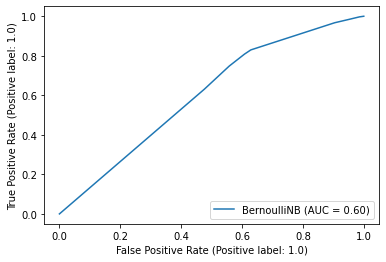

In [53]:
from sklearn.metrics import RocCurveDisplay
clf_disp = RocCurveDisplay.from_estimator(clf, teste_x, teste_y)

In [54]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(teste_y, previsoes))

[[6741    0]
 [1879    0]]


## Agora transformando os dados categóricos

In [24]:
df_dummies = pd.get_dummies(dados.drop(['id_cliente', 'id_emprestimo', 'id_historico', 
        'idade', 'salario', 'tempo_trabalhando',
       'valor_emprestimo', 'juros', 'emp_sal', 'tempo_cliente',
       'INADIMPLENCIA', 'RISCO_INADIMPLENCIA'], axis = 1))
df_dummies

,tipo_imovel_alugado,tipo_imovel_financiado,tipo_imovel_outro,tipo_imovel_proprio,motivo_emprestimo_ensino,motivo_emprestimo_pessoal,motivo_emprestimo_quitar,motivo_emprestimo_reforma,motivo_emprestimo_risco,motivo_emprestimo_saude,grupo_A,grupo_B,grupo_C,grupo_D,grupo_E,grupo_F,grupo_G
0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34473,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
34474,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
34475,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
34476,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [25]:
df_modificado = dados[['id_cliente', 'id_emprestimo', 'id_historico', 
        'idade', 'salario', 'tempo_trabalhando',
       'valor_emprestimo', 'juros', 'emp_sal', 'tempo_cliente',
       'INADIMPLENCIA', 'RISCO_INADIMPLENCIA']]

In [26]:
dados_final = pd.concat([df_modificado, df_dummies], axis = 1)
dados_final.head()

,id_cliente,id_emprestimo,id_historico,idade,salario,tempo_trabalhando,valor_emprestimo,juros,emp_sal,tempo_cliente,...,motivo_emprestimo_reforma,motivo_emprestimo_risco,motivo_emprestimo_saude,grupo_A,grupo_B,grupo_C,grupo_D,grupo_E,grupo_F,grupo_G
0,AspC7qDK-5Esh,kZHfWgGv-0dWJ,UwfbzeaW-9tQt,21.0,60000.0,2.0,8000.0,11.26,0.13,3.0,...,0,0,0,0,1,0,0,0,0,0
1,2NjYU2iT-fGSm,j7elJxsY-eTEQ,viRQ2WYn-yJ2G,40.0,70000.0,6.0,18000.0,7.90,0.26,14.0,...,0,0,0,1,0,0,0,0,0,0
2,nTOKgZCT-YPUD,t9dKvc6a-4eAL,IEHObaim-KPC9,29.0,115000.0,3.0,22000.0,15.23,0.19,7.0,...,0,0,1,0,0,1,0,0,0,0
3,J3jGNZeh-OzZE,NaelpPC5-t2kz,GvqL52S8-S8OH,26.0,84996.0,0.0,9000.0,11.26,0.11,2.0,...,0,0,1,0,1,0,0,0,0,0
4,flpZfspk-bUuL,4NHe4vfi-QLvW,fbc8cPEp-uJEB,23.0,54500.0,2.0,8000.0,11.26,0.15,2.0,...,0,0,0,1,0,0,0,0,0,0


In [27]:
x = dados_final.drop(['id_cliente', 'id_emprestimo', 'id_historico', 'RISCO_INADIMPLENCIA'], axis = 1)
y = dados_final['RISCO_INADIMPLENCIA']

In [28]:
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)
dummy_clf = DummyClassifier()
dummy_clf.fit(treino_x, treino_y)
acuracia = dummy_clf.score(teste_x, teste_y) * 100
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_y)))
print("A acurácia do dummy classifier foi %.2f%%" % acuracia)

Treinaremos com 25858 elementos e testaremos com 8620 elementos
A acurácia do dummy classifier foi 78.20%


In [13]:
from sklearn.model_selection import cross_val_score
bnb = BernoulliNB(binarize=bina)
clf = bnb.fit(treino_x, treino_y)
previsoes = bnb.predict(teste_x)
media = cross_val_score(clf, treino_x, treino_y, cv=5).mean()
desvio_padrao = cross_val_score(clf, treino_x, treino_y, cv=5).std()
print("Accuracy com cross validation, cv = 5 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com cross validation, cv = 5 = [78.18, 78.21]


In [14]:
cross_validate(modelo, x, y, cv = 5)

{'fit_time': array([0.03317833, 0.0265336 , 0.02280188, 0.03059816, 0.0170753 ]),
 'score_time': array([0.00691557, 0.00751758, 0.00395942, 0.00609756, 0.00969458]),
 'test_score': array([0.78204756, 0.78190255, 0.78190255, 0.78201595, 0.78201595])}

In [15]:
cross_val_score(clf, treino_x, treino_y, cv=5)

array([0.78190255, 0.78190255, 0.78190255, 0.78205376, 0.78205376])

In [16]:
cross_val_score(clf, treino_x, treino_y, cv=5, scoring='f1')

array([0., 0., 0., 0., 0.])

In [17]:
cross_val_score(clf, treino_x, treino_y, cv=5, scoring='accuracy')

array([0.78190255, 0.78190255, 0.78190255, 0.78205376, 0.78205376])

In [18]:
cross_val_score(clf, treino_x, treino_y, cv=5, scoring='average_precision')

array([0.27113834, 0.27097973, 0.26302645, 0.27406805, 0.26771217])

In [20]:
cross_val_score(clf, treino_x, treino_y, cv=5, scoring='recall')

array([0., 0., 0., 0., 0.])

In [21]:
cross_val_score(clf, treino_x, treino_y, cv=5, scoring='roc_auc')

array([0.61440335, 0.61631495, 0.60250147, 0.62164351, 0.61191029])

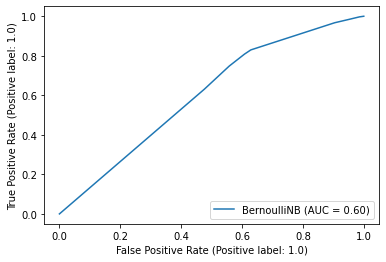

In [22]:
from sklearn.metrics import RocCurveDisplay
clf_disp = RocCurveDisplay.from_estimator(clf, teste_x, teste_y)

In [23]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(teste_y, previsoes))

[[6741    0]
 [1879    0]]


## Agora transformando os dados categóricos

In [24]:
df_dummies = pd.get_dummies(dados.drop(['id_cliente', 'id_emprestimo', 'id_historico', 
        'idade', 'salario', 'tempo_trabalhando',
       'valor_emprestimo', 'juros', 'emp_sal', 'tempo_cliente',
       'INADIMPLENCIA', 'RISCO_INADIMPLENCIA'], axis = 1))
df_dummies

,tipo_imovel_alugado,tipo_imovel_financiado,tipo_imovel_outro,tipo_imovel_proprio,motivo_emprestimo_ensino,motivo_emprestimo_pessoal,motivo_emprestimo_quitar,motivo_emprestimo_reforma,motivo_emprestimo_risco,motivo_emprestimo_saude,grupo_A,grupo_B,grupo_C,grupo_D,grupo_E,grupo_F,grupo_G
0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34473,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
34474,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
34475,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
34476,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [25]:
df_modificado = dados[['id_cliente', 'id_emprestimo', 'id_historico', 
        'idade', 'salario', 'tempo_trabalhando',
       'valor_emprestimo', 'juros', 'emp_sal', 'tempo_cliente',
       'INADIMPLENCIA', 'RISCO_INADIMPLENCIA']]

In [26]:
dados_final = pd.concat([df_modificado, df_dummies], axis = 1)
dados_final.head()

,id_cliente,id_emprestimo,id_historico,idade,salario,tempo_trabalhando,valor_emprestimo,juros,emp_sal,tempo_cliente,...,motivo_emprestimo_reforma,motivo_emprestimo_risco,motivo_emprestimo_saude,grupo_A,grupo_B,grupo_C,grupo_D,grupo_E,grupo_F,grupo_G
0,AspC7qDK-5Esh,kZHfWgGv-0dWJ,UwfbzeaW-9tQt,21.0,60000.0,2.0,8000.0,11.26,0.13,3.0,...,0,0,0,0,1,0,0,0,0,0
1,2NjYU2iT-fGSm,j7elJxsY-eTEQ,viRQ2WYn-yJ2G,40.0,70000.0,6.0,18000.0,7.90,0.26,14.0,...,0,0,0,1,0,0,0,0,0,0
2,nTOKgZCT-YPUD,t9dKvc6a-4eAL,IEHObaim-KPC9,29.0,115000.0,3.0,22000.0,15.23,0.19,7.0,...,0,0,1,0,0,1,0,0,0,0
3,J3jGNZeh-OzZE,NaelpPC5-t2kz,GvqL52S8-S8OH,26.0,84996.0,0.0,9000.0,11.26,0.11,2.0,...,0,0,1,0,1,0,0,0,0,0
4,flpZfspk-bUuL,4NHe4vfi-QLvW,fbc8cPEp-uJEB,23.0,54500.0,2.0,8000.0,11.26,0.15,2.0,...,0,0,0,1,0,0,0,0,0,0


In [27]:
x = dados_final.drop(['id_cliente', 'id_emprestimo', 'id_historico', 'RISCO_INADIMPLENCIA'], axis = 1)
y = dados_final['RISCO_INADIMPLENCIA']

In [28]:
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)
dummy_clf = DummyClassifier()
dummy_clf.fit(treino_x, treino_y)
acuracia = dummy_clf.score(teste_x, teste_y) * 100
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_y)))
print("A acurácia do dummy classifier foi %.2f%%" % acuracia)

Treinaremos com 25858 elementos e testaremos com 8620 elementos
A acurácia do dummy classifier foi 78.20%


In [13]:
from sklearn.model_selection import cross_val_score
bnb = BernoulliNB(binarize=bina)
clf = bnb.fit(treino_x, treino_y)
previsoes = bnb.predict(teste_x)
media = cross_val_score(clf, treino_x, treino_y, cv=5).mean()
desvio_padrao = cross_val_score(clf, treino_x, treino_y, cv=5).std()
print("Accuracy com cross validation, cv = 5 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com cross validation, cv = 5 = [78.18, 78.21]


In [30]:
cross_validate(modelo, x, y, cv = 5)

{'fit_time': array([0.03720856, 0.04924536, 0.04991198, 0.04916549, 0.05081749]),
 'score_time': array([0.01430917, 0.00871086, 0.01040459, 0.00815296, 0.01487708]),
 'test_score': array([0.78204756, 0.78190255, 0.78190255, 0.78201595, 0.78201595])}

In [31]:
cross_val_score(clf, treino_x, treino_y, cv=5)

array([0.78190255, 0.78190255, 0.78190255, 0.78205376, 0.78205376])

In [32]:
cross_val_score(clf, treino_x, treino_y, cv=5, scoring='f1')

array([0., 0., 0., 0., 0.])

In [33]:
cross_val_score(clf, treino_x, treino_y, cv=5, scoring='accuracy')

array([0.78190255, 0.78190255, 0.78190255, 0.78205376, 0.78205376])

In [34]:
cross_val_score(clf, treino_x, treino_y, cv=5, scoring='average_precision')

array([0.26332949, 0.27015138, 0.26458703, 0.27136798, 0.27092923])

In [35]:
cross_val_score(clf, treino_x, treino_y, cv=5, scoring='recall')

array([0., 0., 0., 0., 0.])

In [36]:
cross_val_score(clf, treino_x, treino_y, cv=5, scoring='roc_auc')

array([0.6032797 , 0.61264565, 0.60425008, 0.6188101 , 0.61553962])

In [37]:
from sklearn.metrics import RocCurveDisplay
clf_disp = RocCurveDisplay.from_estimator(clf, teste_x, teste_y)

C:\Users\fabri\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- grupo_A
- grupo_B
- grupo_C
- grupo_D
- grupo_E
- ...

  warnings.warn(message, FutureWarning)


ValueError: X has 25 features, but BernoulliNB is expecting 8 features as input.

In [23]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(teste_y, previsoes))

[[6741    0]
 [1879    0]]
